# 최소제곱법 (Least Ordinary Squares)

최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법(method of least squares, least squares approximation)은 **어떤 계의 해방정식을 근사적으로 구하는 방법**으로, 근사적으로 구하려는 해와 **실제 해의 오차의 제곱의 합이 최소가 되는 해**를 구하는 방법입니다.

In [ ]:
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

## 최소제곱법 공식유도

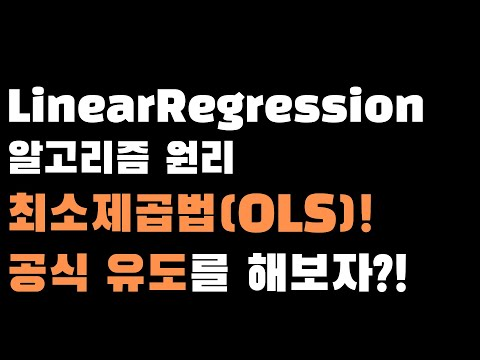

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('-oBmMED_5rI', width=480)

**한계**

- 노이즈(outlier)에 취약합니다.
- 특징 변수와 샘플 건수에 비례해서 계산 비용이 높습니다.

**RSS(Residual Sum of Square)** 공식

실제 값(y)과 가설($\hat{y}$)에 의한 예측 값의 차이가 가장 작은 계수 계산

선형함수: 

$y = wx + b$일때,

- $\Large w = \Large\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

- $\Large b = \Large\bar{y} - w\bar{x}$

## 샘플 데이터를 생성합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

In [ ]:
x, y = make_linear(size=100, w=0.3, b=0.8, noise=0.5)

## Python 코드로 구현

### 최소제곱법 (Least Square) 공식

**RSS(Residual Sum of Square)**

실제 값(y)과 가설($\hat{y}$)에 의한 예측 값의 차이가 가장 작은 계수 계산

선형함수: 

$\Large y = wx + b$일때,

- $\Large w = \Large\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

- $\Large b = \Large\bar{y} - w\bar{x}$

- `x_bar` 변수에는 x에 대한 평균을 구합니다.
- `y_bar` 변수에는 y에 대한 평균을 구합니다.

In [ ]:
# 코드를 입력해 주세요
x_bar = 
y_bar = 

In [ ]:
# 코드검증
print(f'x_bar: {x_bar:.1f}, y_bar: {y_bar:.1f}')

<p><strong>[출력 결과]</strong></p><pre>x_bar: 49.5, y_bar: 15.6
</pre>

### w의 계수 값 찾기

$\Large w = \Large\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

w를 계산하여 `calcaulated_weight`에 대입 합니다.

In [ ]:
# 코드를 입력해 주세요
calculated_weight = 

In [ ]:
# 코드검증
print(f'w: {calculated_weight:.1f}')

<p><strong>[출력 결과]</strong></p><pre>w: 0.3
</pre>

### b의 계수 값 구현


$\Large b = \Large \bar{y} - w\bar{x}$

`calculated_bias` 변수 생성 후 계산된 결과를 대입하세요

In [ ]:
# 코드를 입력해 주세요
calculated_bias = 

In [ ]:
# 코드검증
print(f'b: {calculated_bias:.1f}')

<p><strong>[출력 결과]</strong></p><pre>b: 0.8
</pre>

In [ ]:
# 코드검증
print(f'w: {calculated_weight:.1f}, b: {calculated_bias:.1f}')

<p><strong>[출력 결과]</strong></p><pre>w: 0.3, b: 0.8
</pre>

### 노이즈 값을 증가 시켰을 때

최소제곱법은 **노이즈에 취약하다는 단점**이 있습니다.

이를 직접 눈으로 확인해 보도록 하겠습니다.

In [ ]:
x, y = make_linear(size=100, w=0.3, b=0.8, noise=0.5)

# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5]=20
y[10]=20

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

In [ ]:
# 노이즈가 추가된 데이터셋에 대한 최소제곱법 결과 확인
x_bar = x.mean()
y_bar = y.mean()

calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
calculated_bias = y_bar - calculated_weight * x_bar

# 최종 결과
print(f'w: {calculated_weight:.1f}, b: {calculated_bias:.1f}')

<p><strong>[출력 결과]</strong></p><pre>w: 0.3, b: 2.0
</pre>

## Linear Regression 데모

[Linear Regression 데모](https://www.geogebra.org/m/AuRrgqNV)